# Optuna Search Examples

This notebook shows three quick examples:

1. Search Q-learning on **FrozenLake-v1**
2. Search SARSA on **Blackjack-v1**
3. Search VI on **FrozenLake-v1**

### Optuna dependency

Optuna is an optional dependency in `bettermdptools`.

If you installed via pip:
```
pip install optuna
```

If you are using Poetry:

```
poetry install --with optuna
```


## Imports

In [ ]:
from bettermdptools.experiments import optimize, run

import numpy as np
import matplotlib.pyplot as plt


## Example 1 - Optuna: Q-learning on FrozenLake

This tunes a few common Q-learning hyperparameters and evaluates each trial by the **mean eval score**.


In [1]:
from bettermdptools.experiments import optimize


def suggest(trial):
    return {
        "algo_kwargs": {
            "gamma": trial.suggest_float("gamma", 0.90, 0.999),
            "n_episodes": trial.suggest_int("n_episodes", 500, 2000),
            "init_epsilon": 1.0,
            "min_epsilon": trial.suggest_float("min_epsilon", 0.01, 0.2),
        }
    }


def metric(out):
    scores = out.eval["scores"]
    return float(sum(scores) / len(scores))


res_fl = optimize(
    algo="q_learning",
    env_id="FrozenLake-v1",
    seed=1,
    base_env_kwargs={"is_slippery": False},
    base_eval_kwargs={"n_iters": 50, "render": False},
    suggest=suggest,
    metric=metric,
    n_trials=20,
)

print("best_value:", res_fl.best_value)
print("best_params:", res_fl.best_params)
print("train keys:", list(res_fl.best_run.train.keys()))
print("eval mean:", sum(res_fl.best_run.eval["scores"]) / len(res_fl.best_run.eval["scores"]))


tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2026-01-11 04:24:09,124] A new study created in memory with name: no-name-78b524de-8258-45c7-a116-f1f6210ec1c2
  0%|          | 0/1581 [00:00<?, ?it/s]gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
[I 2026-01-11 04:24:10,153] Trial 0 finished with value: 1.0 and parameters: {'gamma': 0.9412851784655548, 'n_episodes': 1581, 'min_epsilon': 0.010021731215295529}. Best is trial 0 with value: 1.0.
[I 2026-01-11 04:24:10,579] Trial 1 finished with value: 1.0 and parameters: {'gamma': 0.9299309246905522, 'n_episodes': 720, 'min_epsilon': 0.027544333006071585}. Best is trial 0 with value: 1.0.
[I 2026-01-11 04:24:11,118] Trial 2 finished with value: 

best_value: 1.0
best_params: {'gamma': 0.9412851784655548, 'n_episodes': 1581, 'min_epsilon': 0.010021731215295529}
train keys: ['Q', 'V', 'pi', 'Q_track', 'pi_track', 'rewards']
eval mean: 1.0


## Example 2 - Optuna: SARSA on blackjack

This tunes learning-rate and exploration schedules, then plots a simple training trace from the best run.


In [4]:
from bettermdptools.experiments import optimize


def suggest(trial):
    return {
        "algo_kwargs": {
            "gamma": trial.suggest_float("gamma", 0.90, 0.999),

            "init_alpha": trial.suggest_float("init_alpha", 0.05, 0.8, log=True),
            "min_alpha": trial.suggest_float("min_alpha", 0.001, 0.1, log=True),
            "alpha_decay_ratio": trial.suggest_float("alpha_decay_ratio", 0.2, 0.9),

            "init_epsilon": 1.0,
            "min_epsilon": trial.suggest_float("min_epsilon", 0.01, 0.2),
            "epsilon_decay_ratio": trial.suggest_float("epsilon_decay_ratio", 0.2, 0.9),

            # Kept modest for faster feedback
            "n_episodes": trial.suggest_int("n_episodes", 2000, 8000),
        }
    }


def metric(out):
    scores = out.eval["scores"]
    return float(sum(scores) / len(scores))


res_bj = optimize(
    algo="sarsa",
    env_id="Blackjack-v1",
    seed=1,
    base_eval_kwargs={"n_iters": 500, "render": False},
    suggest=suggest,
    metric=metric,
    n_trials=5,
    direction="maximize",
)

print("best_value:", res_bj.best_value)
print("best_params:", res_bj.best_params)
print("train keys:", list(res_bj.best_run.train.keys()))
print("eval mean:", sum(res_bj.best_run.eval["scores"]) / len(res_bj.best_run.eval["scores"]))


[I 2026-01-11 04:30:15,314] A new study created in memory with name: no-name-3bd194e8-9370-4a60-a1a8-1660f66811e4
[I 2026-01-11 04:30:16,339] Trial 0 finished with value: -0.062 and parameters: {'gamma': 0.9412851784655548, 'init_alpha': 0.36840636155584466, 'min_alpha': 0.0010005268542378305, 'alpha_decay_ratio': 0.4116328008422878, 'min_epsilon': 0.03788361925525148, 'epsilon_decay_ratio': 0.26463701633815845, 'n_episodes': 3117}. Best is trial 0 with value: -0.062.
[I 2026-01-11 04:30:18,388] Trial 1 finished with value: -0.022 and parameters: {'gamma': 0.9342105119772618, 'init_alpha': 0.1502192704694275, 'min_alpha': 0.011957309429716375, 'alpha_decay_ratio': 0.49343616008230634, 'min_epsilon': 0.1401917050753843, 'epsilon_decay_ratio': 0.3431165748120622, 'n_episodes': 7269}. Best is trial 1 with value: -0.022.
[I 2026-01-11 04:30:20,423] Trial 2 finished with value: 0.0 and parameters: {'gamma': 0.9027113717265947, 'init_alpha': 0.32084356335810027, 'min_alpha': 0.00683297142808

best_value: 0.0
best_params: {'gamma': 0.9027113717265947, 'init_alpha': 0.32084356335810027, 'min_alpha': 0.006832971428089609, 'alpha_decay_ratio': 0.5910828799120261, 'min_epsilon': 0.036673518333094415, 'epsilon_decay_ratio': 0.33867104235941514, 'n_episodes': 6805}
train keys: ['Q', 'V', 'pi', 'Q_track', 'pi_track', 'rewards']
eval mean: 0.0


### Plot from the best blackjack run

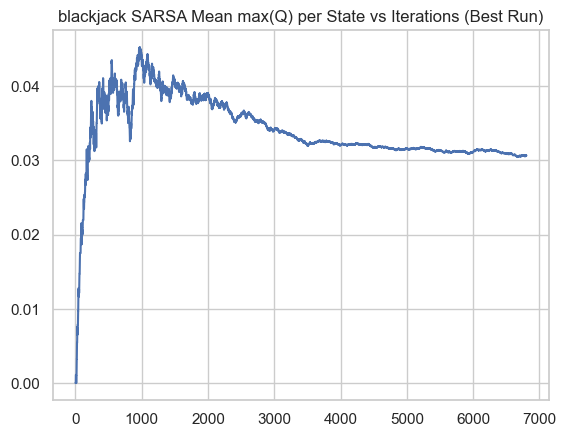

In [6]:
from bettermdptools.utils.plots import Plots
import numpy as np

Q_track = res_bj.best_run.train.get("Q_track")

if Q_track is None:
    print("No Q_track found in training output.")
else:
    # Q_track is typically (n_iters, nS, nA) or (n_episodes, nS, nA)
    best_q_per_iter = np.mean(np.max(Q_track, axis=2), axis=1)  # -> (n_iters,)
    best_q_per_iter = np.trim_zeros(best_q_per_iter, "b")  # remove trailing zeros if preallocated

    Plots.v_iters_plot(
        best_q_per_iter,
        title="blackjack SARSA Mean max(Q) per State vs Iterations (Best Run)",
    )


## Example 3 - Grid search: Value Iteration on FrozenLake

This is a small grid search using `bettermdptools.experiments.run(...)`.

We sweep over a few values of:
- `gamma` (discount factor)
- `theta` (convergence threshold)

Metric: **mean eval score** over a small number of evaluation episodes.

At the end, we plot a heatmap of mean score across the grid.


In [10]:
from bettermdptools.experiments import optimize

def suggest(trial):
    return {
        "algo_kwargs": {
            "gamma": trial.suggest_categorical("gamma", [0.90, 0.95, 0.99]),
            "theta": trial.suggest_categorical("theta", [1e-6, 1e-8, 1e-10]),
            "n_iters": 2000,
        }
    }

def metric(out):
    scores = out.eval["scores"]
    return float(sum(scores) / len(scores))

res_vi = optimize(
    algo="vi",
    env_id="FrozenLake-v1",
    seed=0,
    base_env_kwargs={"is_slippery": False},
    base_eval_kwargs={"n_iters": 50, "render": False},
    suggest=suggest,
    metric=metric,
    n_trials=5,
    direction="maximize",
)

print("best_value:", res_vi.best_value)
print("best_params:", res_vi.best_params)
print("eval mean:", sum(res_vi.best_run.eval["scores"]) / len(res_vi.best_run.eval["scores"]))

[I 2026-01-11 04:45:32,248] A new study created in memory with name: no-name-0d8bf1b0-2d28-4149-9957-f996f6f75c4e
/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
[I 2026-01-11 04:45:32,261] Trial 0 finished with value: 1.0 and parameters: {'gamma': 0.95, 'theta': 1e-10}. Best is trial 0 with value: 1.0.
[I 2026-01-11 04:45:32,270] Trial 1 finished with value: 1.0 and parameters: {'gamma': 0.99, 'theta': 1e-08}. Best is trial 0 with value: 1.0.
[I 2026-01-11 04:45:32,280] Trial 2 finished with value: 1.0 and parameters: {'gamma': 0.95, 'theta': 1e-10}. Best is trial 0 with value: 1.0.
[I 2026-01-11 04:45:32,289] Trial 3 finished with value: 1.0 and parameters: {'gamma': 0.99, 'theta': 1e-06}. Best is trial 0 with value: 1.0.
[I 2026-01-11 04:45:32,301] Trial 4 finished with value: 1.0 and parameters: {'gamma': 0.95, 'theta': 1e-06}. Best is trial 

best_value: 1.0
best_params: {'gamma': 0.95, 'theta': 1e-10}
eval mean: 1.0


### Plot grid-search results

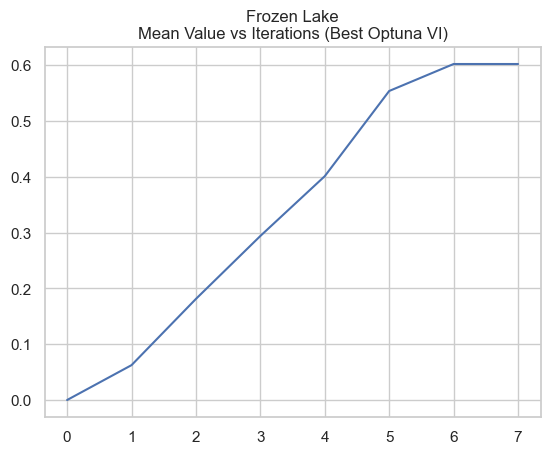

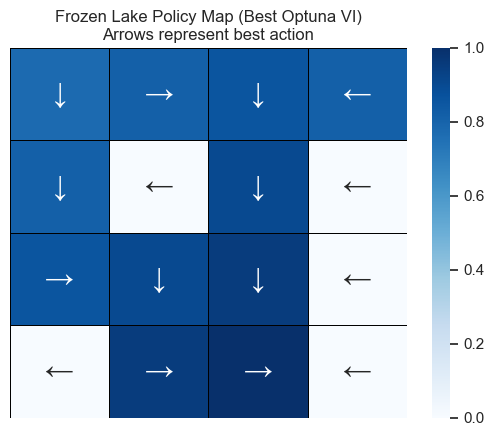

In [11]:
import gymnasium as gym
import numpy as np

from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots

# --- Use Optuna's best params ---
best_gamma = res_vi.best_params["gamma"]
best_theta = res_vi.best_params["theta"]
best_n_iters = res_vi.best_params.get("n_iters", 2000)  

# --- Re-run VI once with the best settings so we have V_track for plotting ---
env = gym.make("FrozenLake-v1", render_mode=None, is_slippery=False)

V, V_track, pi = Planner(env.P).value_iteration(
    gamma=best_gamma,
    theta=best_theta,
    n_iters=best_n_iters,
)

# --- Plot: mean value vs iterations ---
# Clip trailing zeros in case convergence happens before n_iters
mean_v_per_iter = np.trim_zeros(np.mean(V_track, axis=1), "b")
Plots.v_iters_plot(mean_v_per_iter, "Frozen Lake\nMean Value vs Iterations (Best Optuna VI)")

# --- Plot: policy map ---
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
map_size = (4, 4)  # FrozenLake-v1 is 4x4 by default

val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, map_size)
Plots.plot_policy(val_max, policy_map, map_size, "Frozen Lake Policy Map (Best Optuna VI)\nArrows represent best action")
